In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'C:\Users\yousuf\source\DataAnalysisProjects\Mall_CustomerSegmentation\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Summary statistics of df
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Checking for any missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### *Description:*

The dataset contains 200 rows & 5 columns: 'CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'. Absolutely no missing values present.

## Univariate Analysis

Let's examine single variable individually and look at the distribution of 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'

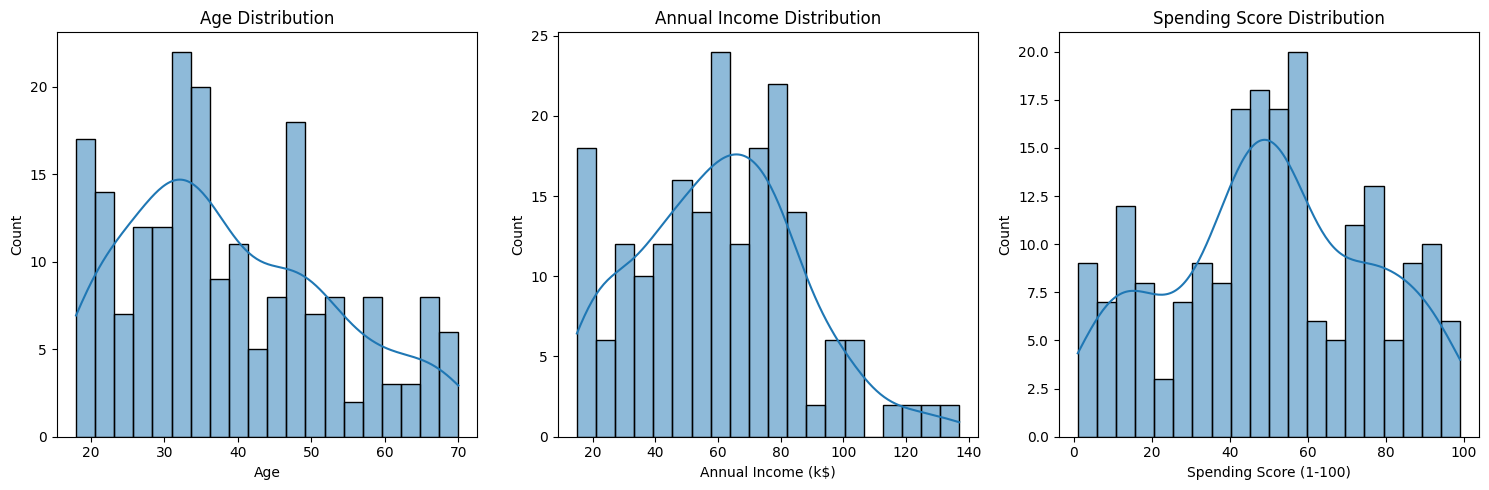

In [5]:
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')

# Annual Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

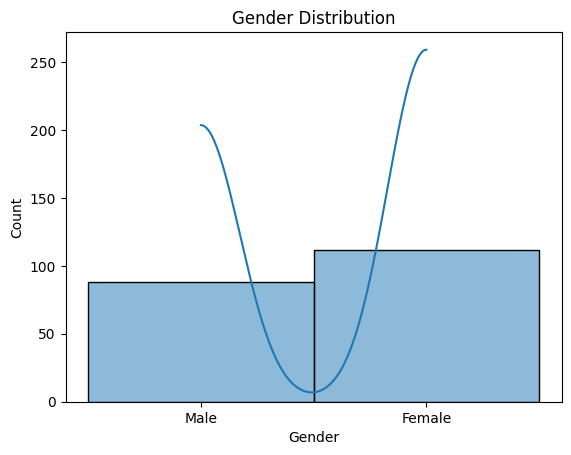

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [6]:
# Let's look into the gender distribution analysis
#plt.figure(figsize=(6, 4))
sns.histplot(df['Gender'], kde=True)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#Gender contribution Percentage Wise
df['Gender'].value_counts(normalize=True)

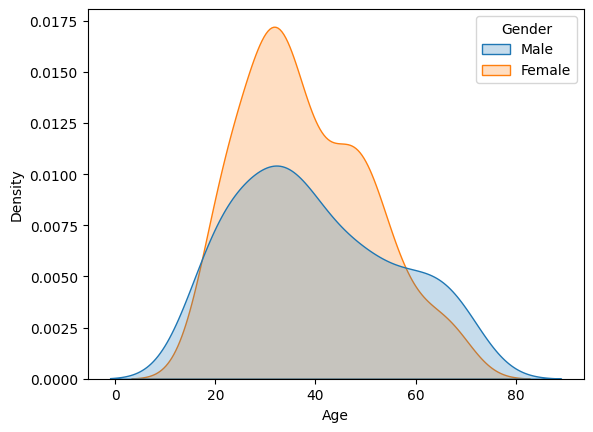

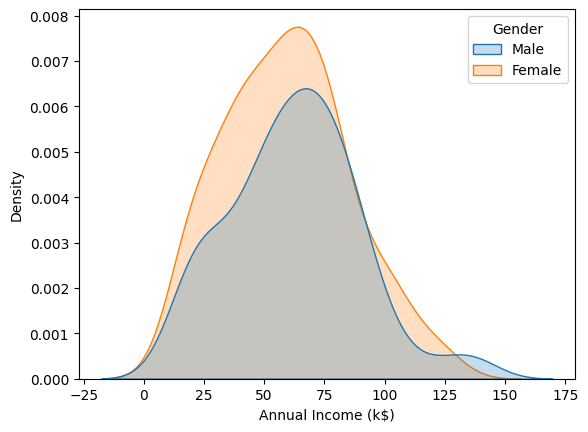

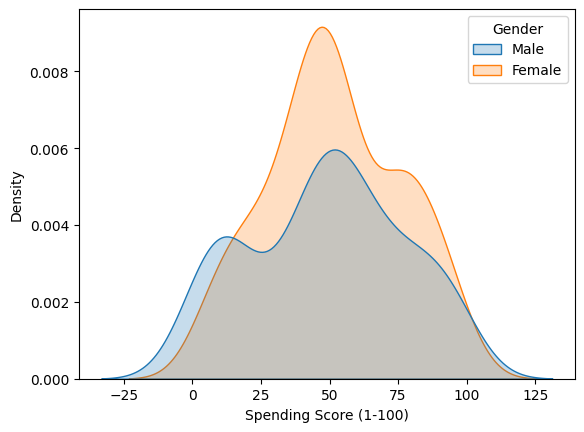

In [7]:
# Univariate analysis based on Gender
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for cols in columns:
    plt.figure()
    sns.kdeplot(data=df, x=cols, fill=True, hue='Gender')
    plt.show()

#### *Description:*

The above figures show the distribution of Age, Annual Income, and Spending Score:

Age: The distribution appears to be right-skewed, with most customers between 30-50 years old.

Annual Income: The distribution is roughly normal, with most incomes between 40-80k.

Spending Score: This distribution appears to be bimodal, suggesting two distinct groups of customers with different spending habit

*NOTE: By all these analysis, we understand that more female are contributing into the mall customer data*s.


## Bivariate Analysis

In this bivariate analysis, let's examine the relation between two variables individually and look at the distribution of ['Age & Annual Income (k$)'], and  ['Annual Income (k$) & Spending Score (1-100)'] and ['Age & Spending Score (1-100)']

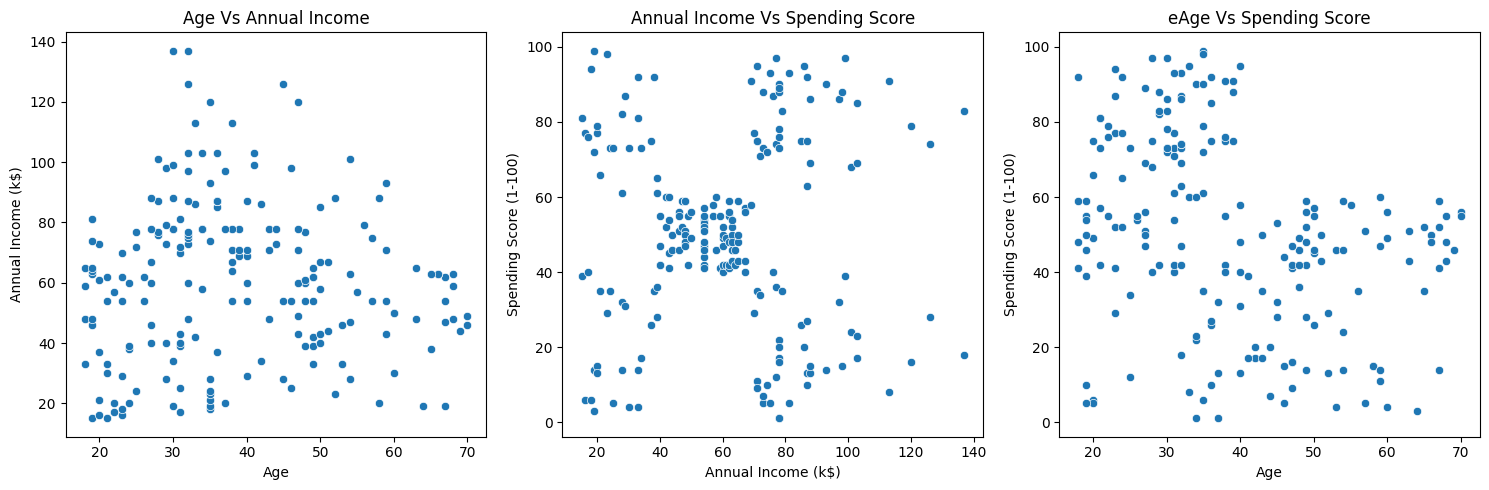

In [8]:
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.title('Age Vs Annual Income')

# Annual Income Distribution
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income Vs Spending Score')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.title('eAge Vs Spending Score')

plt.tight_layout()
plt.show()

#### *Description:*

The above figures show the relationships between pairs of variables, such as:

Age vs Annual Income: There's no clear linear relationship, but we can see that higher incomes are more common in between 30-60 age range.

Age vs Spending Score: Younger customers (below 40) seem to have a wider range of spending scores.

Annual Income vs Spending Score: There's an interesting pattern here, suggesting potential customer segments.

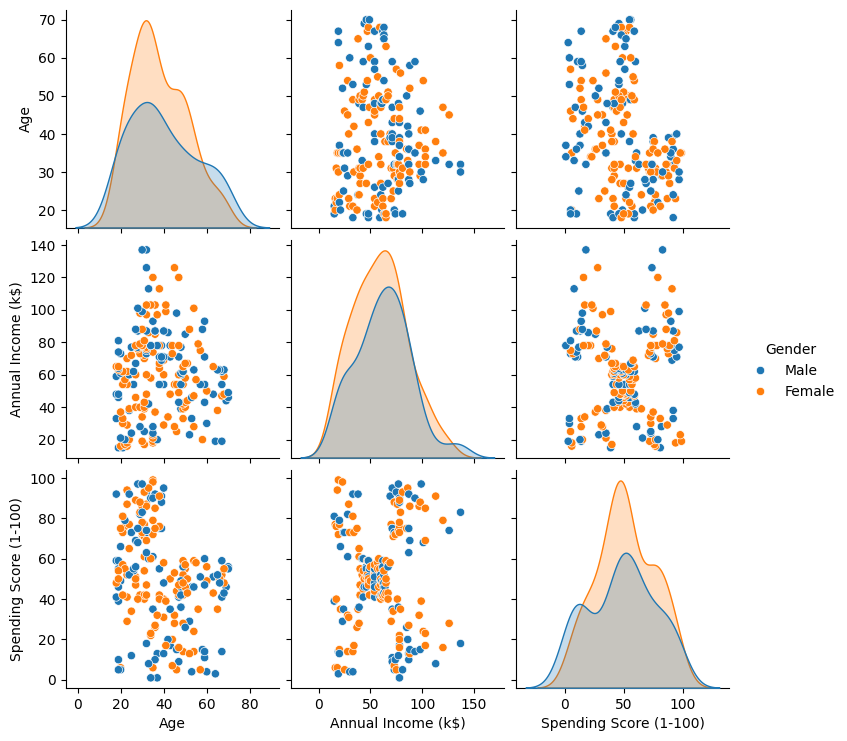

In [9]:
# Let's analyze multiple variables and their correlation with respect to Gender
sns.pairplot(df.drop(columns=['CustomerID']), hue='Gender')

This pairplot provides a comprehensive view for the potential clusters forming, especially in the Annual Income vs Spending Score plot. To further investigate this, performing a clustering analysis, such as K-means clustering can be helpful.

In [10]:
# Let's now look at the mean values grouping by Gender
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098,59.250,51.527
Male,39.807,62.227,48.511


## Multivariate Analysis

In [11]:
# Correlation Matrix 
print(df.drop(columns=['CustomerID', 'Gender']).corr())

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


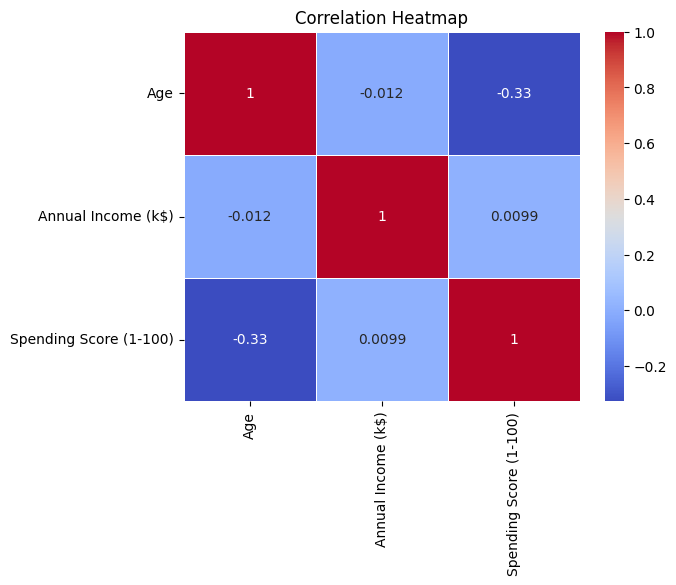

In [12]:
# Visualizing correlation matrix
sns.heatmap(df.drop(columns=['CustomerID', 'Gender']).corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

# KMeans Clustering (Bivariate)

C:\Users\yousuf\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yousuf\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\yousuf\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yousuf\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\yousuf\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

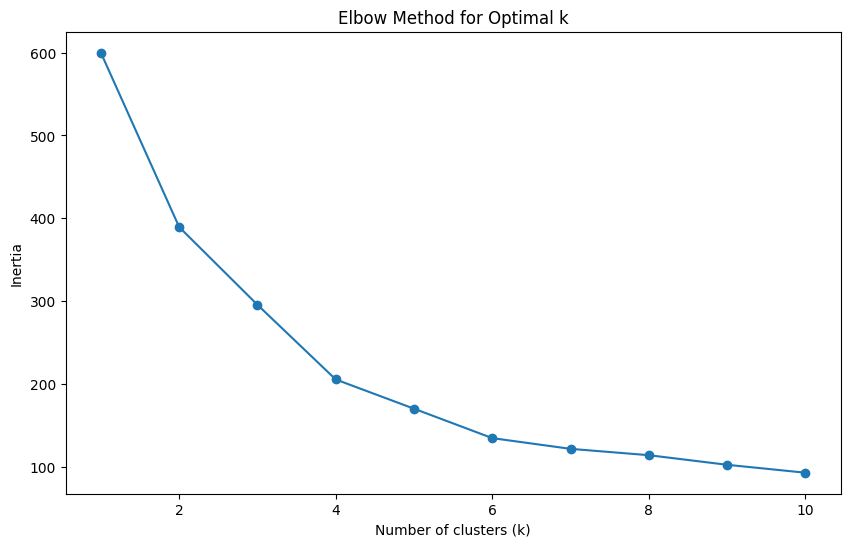

In [13]:
# Prepare the data
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
# Setting the clusters to 5 as PCA 
clustering = KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Assigning Cluster Labels to new column
df['Income & Spending Clusters'] = clustering.labels_
df.head()

C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income & Spending Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [15]:
# Extract cluster centers
cluster_centers = clustering.cluster_centers_

# Creating dataframe for cluster center points
centers_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centers_df.columns = ['x', 'y']
centers_df.head()

,x,y
0,86.538462,82.128205
1,88.200000,17.114286
2,25.727273,79.363636
3,55.296296,49.518519
4,26.304348,20.913043


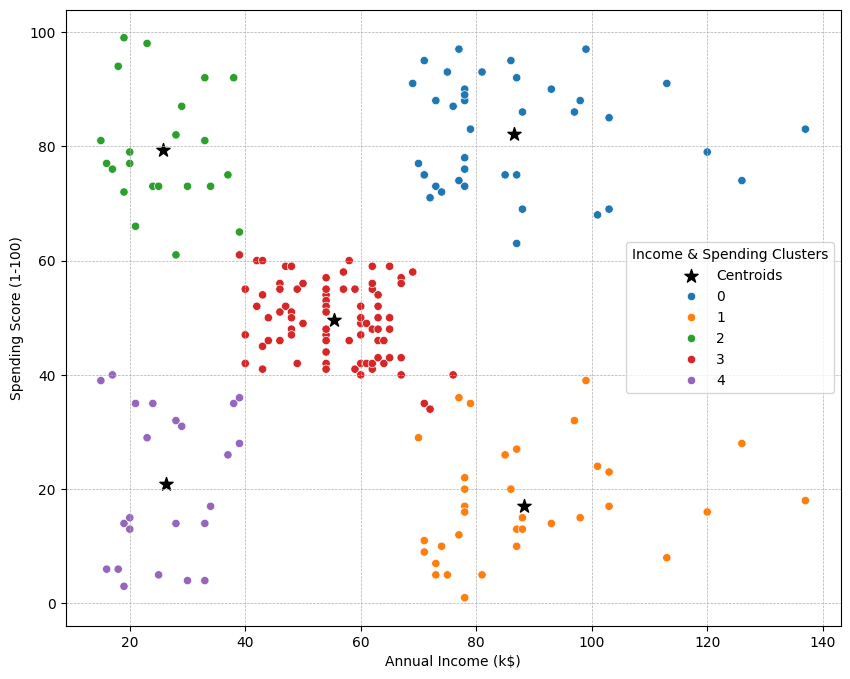

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers_df['x'], y=centers_df['y'], s=100, color='black', marker='*', label='Centroids')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income & Spending Clusters', palette='tab10')
# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('Clustered_Segmented_Customers_Analysis.png')

This scatter plot visualizes the customer segments based on their annual income and spending score. The clustering algorithm has identified five distinct groups:

Low Income, Low Spending (Cluster 0)

Low Income, High Spending (Cluster 4)

Medium Income, Medium Spending (Cluster 1)

High Income, Low Spending (Cluster 3)

High Income, High Spending (Cluster 2)

In [17]:
pd.crosstab(df['Income & Spending Clusters'], df['Gender'], normalize='index')

Gender,Female,Male
Income & Spending Clusters,,
0,0.538462,0.461538
1,0.457143,0.542857
2,0.590909,0.409091
3,0.592593,0.407407
4,0.608696,0.391304


In [18]:
# Grouping the 'Income & Spending Clustering' and calculates the mean values for each cluster
df.groupby('Income & Spending Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Clusters,,,
0,32.69,86.54,82.13
1,41.11,88.20,17.11
2,25.27,25.73,79.36
3,42.72,55.30,49.52
4,45.22,26.30,20.91


### Detailed Insights: Clustering of Annual Income and Spending Scores (Bivariate Analysis)

#### The insights from the clustering analysis grouped by 'Income & Spending Clusters' can provide valuable information for the marketing team. Here is a detailed analysis of each cluster based on the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)':

##### Insights for Each Cluster:

##### *Cluster 0:*

Average Age: 45.22
Annual Income (k$): 26.30
Spending Score (1-100): 20.91
Insights:

This cluster represents older customers with high annual income but low spending scores.
These customers might be more financially secure but less inclined to spend on discretionary items.
Marketing Strategy: Target this group with promotions for premium products, luxury items, or high-quality goods that justify their spending.

##### *Cluster 1:*

Average Age: 42.72		
Annual Income (k$): 55.30
Spending Score (1-100): 49.52

Insights:

This cluster consists of younger customers with lower annual incomes but high spending scores.
These customers are likely to spend a significant portion of their income on shopping.
Marketing Strategy: Focus on affordable yet trendy products, discounts, and loyalty programs to retain these high-spending young customers.

##### *Cluster 2:*

Average Age: 32.69		
Annual Income (k$): 86.54
Spending Score (1-100): 82.13

Insights:

This cluster includes middle-aged customers with moderate annual incomes and spending scores.
They represent a balanced spending behavior.
Marketing Strategy: Offer value-for-money products, moderate discounts, and quality service to attract and retain this balanced spending group.

##### *Cluster 3:*

Average Age: 32.69
Annual Income (k$): 86.54
Spending Score (1-100): 82.13

Insights:

This cluster represents relatively young customers with high annual income and high spending scores.
They are the most valuable customers due to their high spending potential.
Marketing Strategy: Prioritize this segment with exclusive offers, personalized marketing, premium product launches, and VIP customer experiences to maximize their spending and loyalty.

##### *Cluster 4:*

Average Age: 25.27				
Annual Income (k$): 25.73
Spending Score (1-100): 79.36

Insights:

This cluster comprises older customers with low annual income and low spending scores.
These customers are less likely to spend significantly at the mall.
Marketing Strategy: Focus on essential and budget-friendly products, basic promotions, and cost-effective marketing strategies to appeal to this price-sensitive segment.


#### *Overall Insights:*

*The marketing team can use these insights to tailor their strategies to different customer segments, optimizing their campaigns to increase engagement and sales.*

##### *High-income clusters with high spending scores (Cluster 2) should be targeted for premium and exclusive offers.*

#####  *Younger, high-spending but low-income clusters (Cluster 4) can be attracted with affordable pricing and trendy products.*

#####  *Balanced spenders and income (Cluster 1) can be targeted with value-for-money offers.*

#####  *Older, low-income, low-spending clusters (Cluster 0) might need more basic and essential product offerings.*

#####  *Older, high-income but low-spending clusters (Cluster 3) might appreciate premium quality over quantity.*

# KMeans Clustering (Multivariate)

In [72]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income & Spending Clusters'],
      dtype='object')

In [73]:
# Let's transform the 'Gender' values into numerical values using one hot encoding
dummied_df = pd.get_dummies(df, columns=['Gender'], dtype=int)
dummied_df.columns
dummied_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income & Spending Clusters,Gender_Female,Gender_Male
0,1,19,15,39,4,0,1
1,2,21,15,81,2,0,1
2,3,20,16,6,4,1,0
3,4,23,16,77,2,1,0
4,5,31,17,40,4,1,0


In [74]:
dummied_df = dummied_df.drop(columns=['Gender_Male'])

# Invert the 'gender' column values: 0 -> Female; 1 -> Male
dummied_df = dummied_df.rename(columns={'Gender_Female': 'Gender'})
dummied_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income & Spending Clusters,Gender
0,1,19,15,39,4,0
1,2,21,15,81,2,0
2,3,20,16,6,4,1
3,4,23,16,77,2,1
4,5,31,17,40,4,1


In [75]:
dummied_df1 = dummied_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dummied_df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [76]:
# Now scaling the dataframe
scale = StandardScaler()
scaled_dummied_df = pd.DataFrame(scale.fit_transform(dummied_df1))
scaled_dummied_df.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [77]:
# Calculate the inertia for different number of clusters
inertia_values_scaled_dummied_df= []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans_dummied_df = KMeans(n_clusters=k)
    kmeans_dummied_df.fit(scaled_dummied_df)
    inertia_values_scaled_dummied_df.append(kmeans_dummied_df.inertia_)
print(inertia_values_scaled_dummied_df)

[600.0, 389.3861889564372, 297.02654463384187, 252.10682456184531, 168.24758017556834, 134.3008171098464, 117.08803464058246, 103.84623824277769, 94.18328388567025, 89.91298719440587]


C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Wi

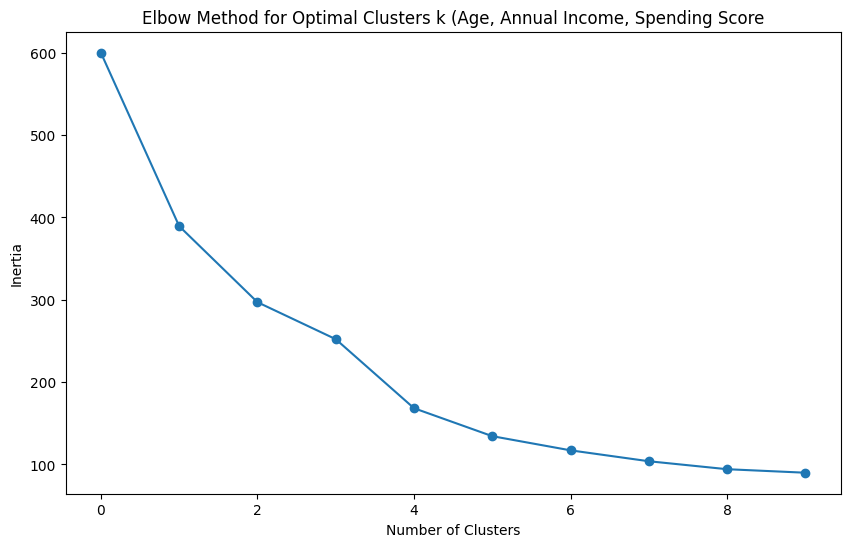

In [78]:
# Plot the inertia values
plt.figure(figsize = (10, 6))
plt.plot(inertia_values_scaled_dummied_df, marker='o')
plt.title('Elbow Method for Optimal Clusters k (Age, Annual Income, Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
# Setting the clusters to 5 as PCA 
multivariate_clustering = KMeans(n_clusters=5)
multivariate_clustering.fit(dummied_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Assigning Cluster Labels to new column
dummied_df1['Age, Income, & Spending Clusters'] = multivariate_clustering.labels_
dummied_df1.head()

C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\AppData\Local\Temp\ipykernel_14192\915840326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummied_df1['Age, Income, & Spending Clusters'] = multivariate_clustering.labels_


,Age,Annual Income (k$),Spending Score (1-100),"Age, Income, & Spending Clusters"
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1


In [84]:
# Cluster center points
cluster_centers_dummied_df = multivariate_clustering.cluster_centers_
print(cluster_centers_dummied_df)

[[25.25       25.83333333 76.91666667]
 [54.06       40.46       36.72      ]
 [32.69230769 86.53846154 82.12820513]
 [41.64705882 88.73529412 16.76470588]
 [33.39622642 58.05660377 48.77358491]]


In [85]:
# Column names for the features
cluster_center_df = pd.DataFrame(cluster_centers_dummied_df, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_center_df)


         Age  Annual Income (k$)  Spending Score (1-100)
0  25.250000           25.833333               76.916667
1  54.060000           40.460000               36.720000
2  32.692308           86.538462               82.128205
3  41.647059           88.735294               16.764706
4  33.396226           58.056604               48.773585


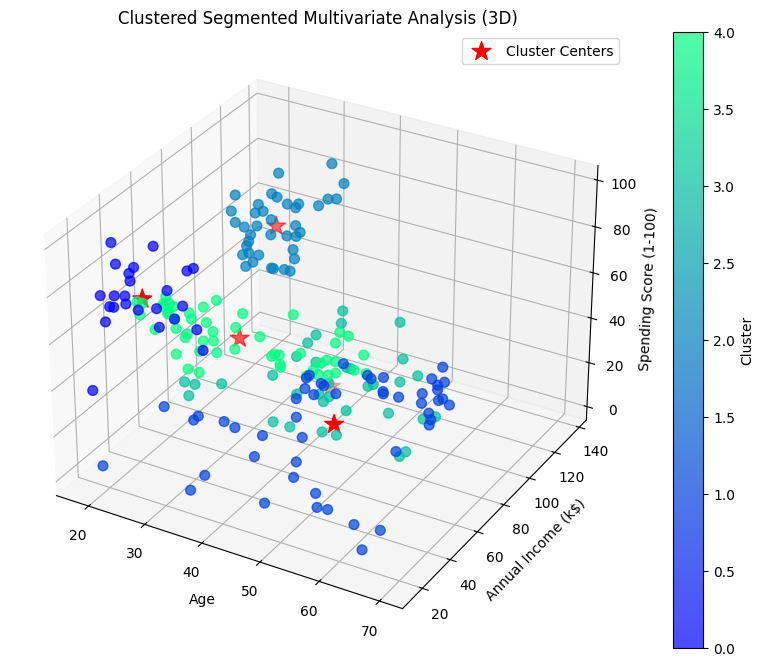

In [86]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points, colored by cluster
scatter = ax.scatter(dummied_df1['Age'], dummied_df1['Annual Income (k$)'], dummied_df1['Spending Score (1-100)'], c=dummied_df1['Age, Income, & Spending Clusters'], cmap='winter', s=50, alpha=0.7)

# Plot cluster centers
ax.scatter(cluster_centers_dummied_df[:, 0], cluster_centers_dummied_df[:, 1], cluster_centers_dummied_df[:, 2], c='red', marker='*', s=200, label='Cluster Centers')

ax.set_title('Clustered Segmented Multivariate Analysis (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
fig.colorbar(scatter, ax=ax, label='Cluster')

# Save the plot
plt.savefig('Clustered_MultivariatePlot_3DView.png')

plt.show()

In [91]:
crosstab_df = pd.crosstab(dummied_df1['Age, Income, & Spending Clusters'], dummied_df['Gender'], normalize='index')
# Rename the columns
crosstab_df = crosstab_df.rename(columns={0: 'Female', 1: 'Male'})
crosstab_df

Gender,Female,Male
"Age, Income, & Spending Clusters",,
0,0.416667,0.583333
1,0.440000,0.560000
2,0.461538,0.538462
3,0.558824,0.441176
4,0.358491,0.641509


In [93]:
# Grouping the 'Income & Spending Clustering' and calculates the mean values for each cluster
dummied_df1.groupby('Age, Income, & Spending Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
"Age, Income, & Spending Clusters",,,
0,25.25,25.83,76.92
1,54.06,40.46,36.72
2,32.69,86.54,82.13
3,41.65,88.74,16.76
4,33.40,58.06,48.77


In [94]:
dummied_df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Age, Income, & Spending Clusters'],
      dtype='object')

In [104]:
dummied_df['Gender'] = dummied_df['Gender'].replace({0: 'Female', 1: 'Male'})
dummied_df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income & Spending Clusters', 'Gender'],
      dtype='object')

In [105]:
dummied_df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Age, Income, & Spending Clusters'],
      dtype='object')

In [106]:
# Assigning the columns to final df
dummied_df['Age, Income, & Spending Clusters'] = dummied_df1['Age, Income, & Spending Clusters']

# Display the updated DataFrame
print(dummied_df.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   19                  15                      39   
1           2   21                  15                      81   
2           3   20                  16                       6   
3           4   23                  16                      77   
4           5   31                  17                      40   

   Income & Spending Clusters  Gender  Age, Income, & Spending Clusters  
0                           4  Female                                 0  
1                           2  Female                                 0  
2                           4    Male                                 1  
3                           2    Male                                 0  
4                           4    Male                                 1  


In [107]:
# Saving thie clustered data file
dummied_df.to_csv('Clustered_Segmented_Data.csv')